In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

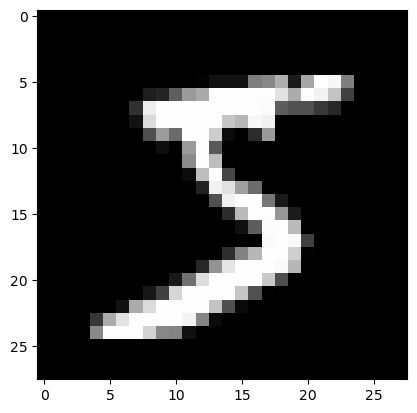

In [4]:
plt.imshow(X_train[0], cmap='gray')

In [5]:
y_train[0]

5

In [6]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [7]:
import tensorflow as tf

y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [8]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

def create_cnn_model():
    cnn_model = models.Sequential()
    cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
    #If RGB feature maps, input_shape=(28, 28, 3)
    cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
    cnn_model.add(MaxPool2D(pool_size=(2,2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
    cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
    cnn_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Flatten())
    cnn_model.add(Dense(256, activation = "relu"))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(10, activation = "softmax"))
    #If binary classification, units=1 and activation='sigmoid'

    cnn_model.compile(optimizer=RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    #If binary classification, loss='binary_crossentropy' and metrics=['binary_accuracy']

    return cnn_model

In [9]:
from scikeras.wrappers import KerasClassifier

model = KerasClassifier(model=create_cnn_model, verbose=0)

In [10]:
model.fit(X_train, y_train_onehot)

KerasClassifier(
	model=<function create_cnn_model at 0x000001EED63E5BC0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [11]:
y_test_pred = model.predict(X_test)
y_test_pred

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
y_test_pred = np.argmax(y_test_pred, axis=1)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.99      0.95      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [14]:
confusion_matrix(y_test,y_test_pred)

array([[ 974,    0,    2,    0,    0,    0,    3,    0,    1,    0],
       [   2, 1122,    6,    0,    0,    2,    0,    1,    2,    0],
       [   2,    2, 1024,    0,    0,    0,    0,    4,    0,    0],
       [   0,    0,    6,  999,    0,    1,    0,    2,    1,    1],
       [   0,    0,    0,    0,  958,    0,    4,    3,    2,   15],
       [   0,    0,    0,    9,    0,  877,    5,    0,    1,    0],
       [  12,    2,    1,    0,    1,    1,  938,    0,    3,    0],
       [   0,    3,   20,    1,    1,    0,    0,  999,    1,    3],
       [   8,    1,    8,   12,    0,    6,    3,    2,  929,    5],
       [   2,    4,    3,    2,    7,   10,    1,    7,    3,  970]],
      dtype=int64)

In [15]:
y_test_pred_proba = model.predict_proba(X_test)
y_test_pred_proba

array([[2.66812805e-07, 1.40963508e-07, 2.49498189e-05, ...,
        9.99954462e-01, 1.15181486e-07, 8.64825233e-06],
       [4.96946539e-10, 6.48332366e-09, 1.00000000e+00, ...,
        6.20517873e-11, 2.59733277e-11, 1.01889941e-14],
       [3.75439090e-12, 9.99998927e-01, 5.49239765e-10, ...,
        3.48224893e-10, 1.76344592e-10, 1.55083880e-11],
       ...,
       [1.72719098e-13, 1.30417532e-09, 3.20907537e-12, ...,
        6.28568420e-10, 5.63972979e-10, 2.71629617e-08],
       [3.73171156e-06, 4.25134601e-07, 5.57926853e-07, ...,
        2.38433415e-07, 1.40930945e-02, 7.91200728e-06],
       [5.48722028e-07, 2.83901080e-09, 8.88539375e-09, ...,
        1.16472656e-11, 4.13755146e-08, 2.78459200e-10]], dtype=float32)

Text(0.5, 1.0, 'Receiver Operating Characteristic - CNNClassifier (Tensorflow)')

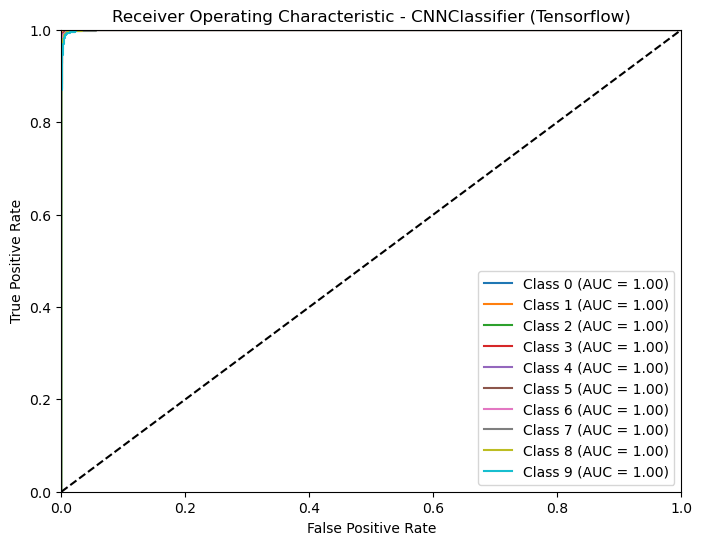

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))
for class_idx in range(len(model.classes_)):
    y_true = (y_test == model.classes_[class_idx]).astype(int)
    y_pred_proba = y_test_pred_proba[:, class_idx]
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'Class {model.classes_[class_idx]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - CNNClassifier (Tensorflow)')